### Classification

In [ ]:
import pandas as pd
germanData = pd.read_csv('german.data-numeric', sep='\s+')
germanData.dropna(axis=0)
columns = []
for i in range(24):
    columns.append('column' + str(i))
columns.append('class')

germanData.columns = columns
germanData.head()


,column0,column1,column2,column3,column4,column5,column6,column7,column8,column9,...,column15,column16,column17,column18,column19,column20,column21,column22,column23,class
0,2,48,2,60,1,3,2,2,1,22,...,0,0,1,0,0,1,0,0,1,2
1,4,12,4,21,1,4,3,3,1,49,...,0,0,1,0,0,1,0,1,0,1
2,1,42,2,79,1,4,3,4,2,45,...,0,0,0,0,0,0,0,0,1,1
3,1,24,3,49,1,3,3,4,4,53,...,1,0,1,0,0,0,0,0,1,2
4,4,36,2,91,5,3,3,4,4,35,...,0,0,1,0,0,0,0,1,0,1


In [ ]:
# making a decision tree for german credit data
from sklearn import tree

Y = germanData['class']
X = germanData.drop(['class'], axis=1)


clf = tree.DecisionTreeClassifier(criterion='gini', max_depth=3)
clf = clf.fit(X, Y)

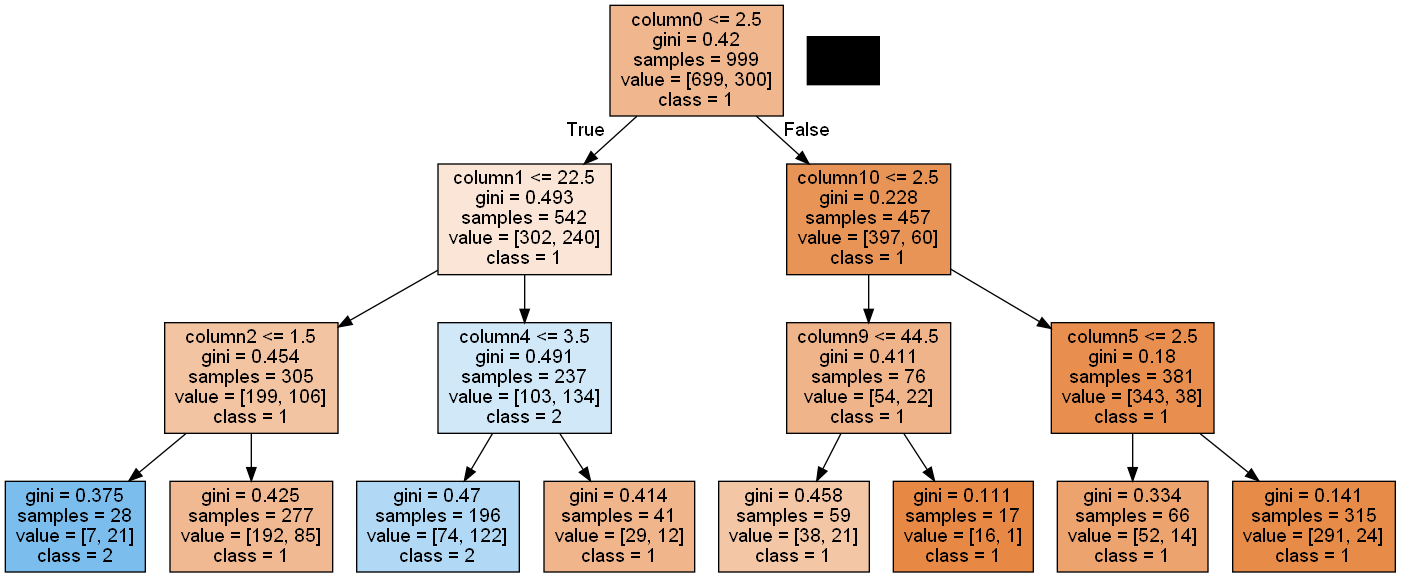

In [ ]:
import pydotplus
from IPython.display import Image

dot_data = tree.export_graphviz(clf, feature_names=X.columns, class_names=['1','2'], filled=True,
                                out_file=None)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

Holdout German - 1.1

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, f1_score
import numpy as np

trainAcc = np.zeros(5)
testAcc = np.zeros(5)
precision = np.zeros(5)
fMeasure = np.zeros(5)

for i in range(5):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.9)
    clf = clf.fit(X_train, Y_train)
    Y_predTrain = clf.predict(X_train)
    Y_predTest = clf.predict(X_test)

    trainAcc[i] = accuracy_score(Y_train, Y_predTrain)
    testAcc[i] = accuracy_score(Y_test, Y_predTest)
    precision[i] = precision_score(Y_test, Y_predTest)
    fMeasure[i] = f1_score(Y_test, Y_predTest)

    print(f'\nTrial {i + 1}:')
    print(f'Training accuracy: {trainAcc[i]:0.2f}')
    print(f'Test accuracy: {testAcc[i]:0.2f}')
    print(f'Precision: {precision[i]:0.2f}')
    print(f'F-measure: {fMeasure[i]:0.2f}')

trainAvg = sum(trainAcc)/len(trainAcc)
testAvg = sum(testAcc)/len(testAcc)
precisionAvg = sum(precision)/len(precision)
fAvg = sum(fMeasure)/len(fMeasure)

print('\nAverages:')
print(f'Training accuracy avg: {trainAvg:0.2f}')
print(f'Test accuracy avg: {testAvg:0.2f}')
print(f'Precision avg: {precisionAvg:0.2f}')
print(f'F-Measure avg: {fAvg:0.2f}')


Trial 1:
Training accuracy: 0.84
Test accuracy: 0.65
Precision: 0.74
F-measure: 0.75

Trial 2:
Training accuracy: 0.85
Test accuracy: 0.70
Precision: 0.72
F-measure: 0.81

Trial 3:
Training accuracy: 0.82
Test accuracy: 0.70
Precision: 0.72
F-measure: 0.81

Trial 4:
Training accuracy: 0.85
Test accuracy: 0.66
Precision: 0.75
F-measure: 0.76

Trial 5:
Training accuracy: 0.85
Test accuracy: 0.65
Precision: 0.73
F-measure: 0.76

Averages:
Training accuracy avg: 0.84
Test accuracy avg: 0.67
Precision avg: 0.73
F-Measure avg: 0.78


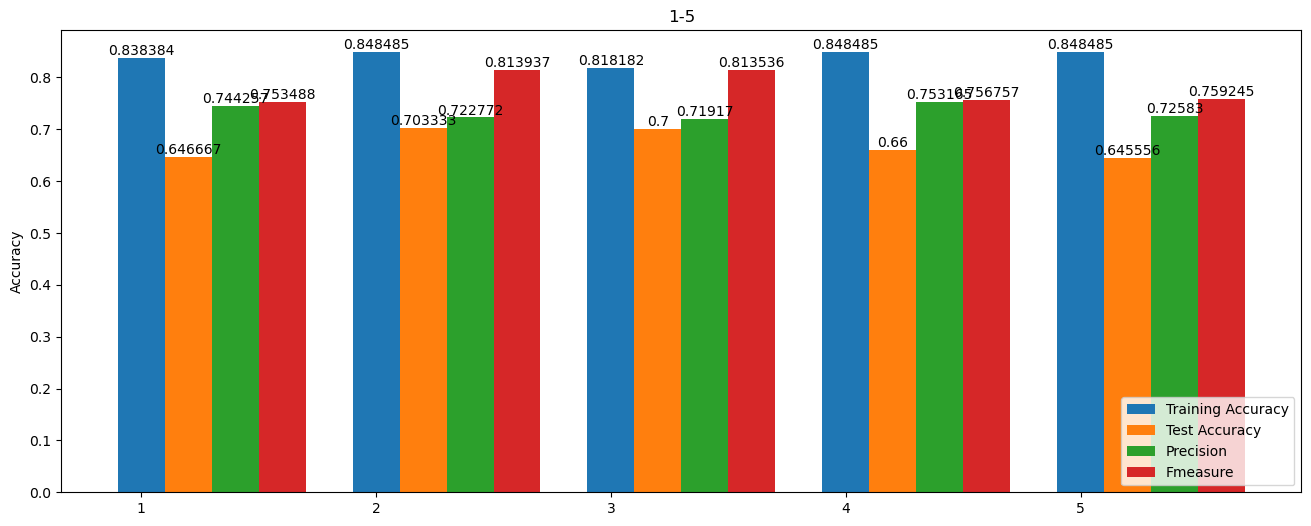

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

labels = ['1', '2', '3', '4', '5']
fig, ax = plt.subplots()

fig.set_size_inches(16, 6)
trainingRect = ax.bar( [0, 1, 2, 3, 4], trainAcc, 0.2, label='Training Accuracy')
testingRect = ax.bar([0.2, 1.2, 2.2, 3.2, 4.2], testAcc, 0.2, label='Test Accuracy')
precRect = ax.bar( [0.4, 1.4, 2.4, 3.4, 4.4], precision, 0.2, label='Precision')
fRect = ax.bar([0.6, 1.6, 2.6, 3.6, 4.6], fMeasure, 0.2, label='Fmeasure')
ax.set_title('1-5')
ax.set_ylabel('Accuracy')

plt.xticks([0, 1, 2, 3, 4], labels)
ax.legend()
plt.legend(loc='lower right')
ax.bar_label(trainingRect)
ax.bar_label(testingRect)
ax.bar_label(precRect)
ax.bar_label(fRect)
plt.show()

German data - Cross-validation - 1.2

In [ ]:
from sklearn.model_selection import KFold, cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, f1_score

scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision': make_scorer(precision_score),
           'f1_score': make_scorer(f1_score)}

results = cross_validate(clf, X, Y, cv=KFold(n_splits=10), scoring=scoring)

print(f'Accuracy: {np.mean(results["test_accuracy"]) :0.2f}' )
print(f'Precision: {np.mean(results["test_precision"]): 0.2f}')
print(f'F-Measure: {np.mean(results["test_f1_score"]):0.2f}' )

Accuracy: 0.73
Precision:  0.78
F-Measure: 0.82


Part 2 - With Entropy not Gini

In [ ]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)
clf = clf.fit(X, Y)

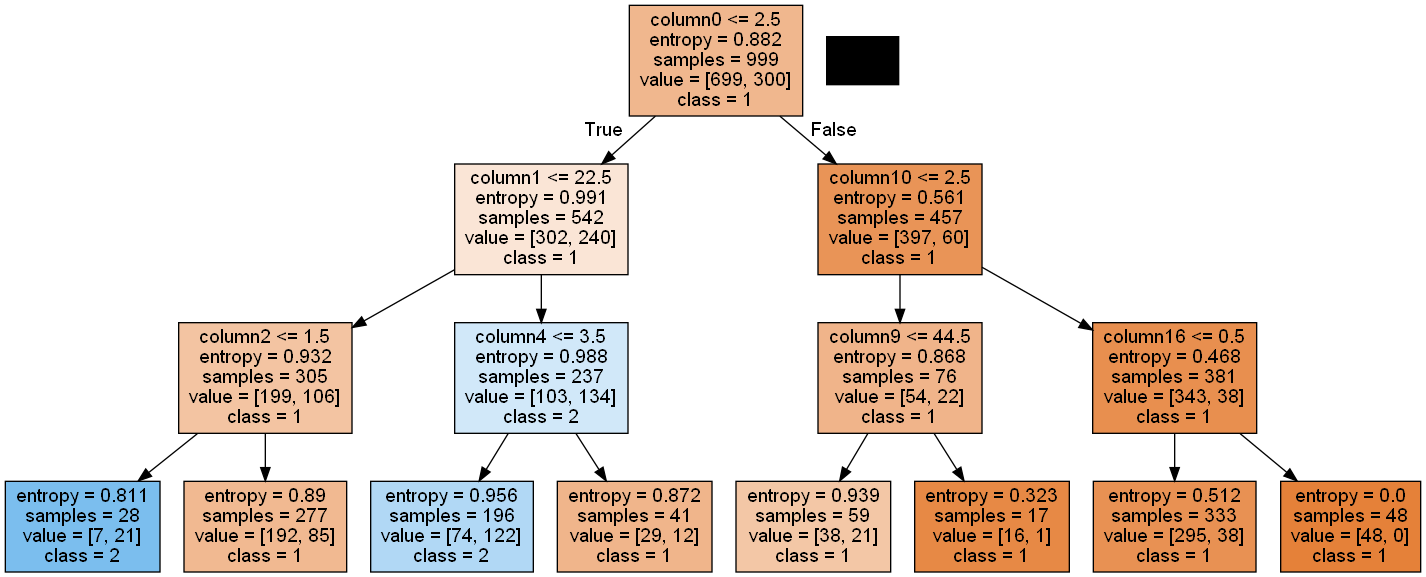

In [ ]:
import pydotplus
from IPython.display import Image

dot_data = tree.export_graphviz(clf, feature_names=X.columns, class_names=['1','2'], filled=True,
                                out_file=None)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

Part 2.1 - Holdout

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, f1_score
import numpy as np

trainAcc = np.zeros(5)
testAcc = np.zeros(5)
precision = np.zeros(5)
fMeasure = np.zeros(5)

for i in range(5):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.9)
    clf = clf.fit(X_train, Y_train)
    Y_predTrain = clf.predict(X_train)
    Y_predTest = clf.predict(X_test)

    trainAcc[i] = accuracy_score(Y_train, Y_predTrain)
    testAcc[i] = accuracy_score(Y_test, Y_predTest)
    precision[i] = precision_score(Y_test, Y_predTest)
    fMeasure[i] = f1_score(Y_test, Y_predTest)

    print(f'\nTrial {i + 1}:')
    print(f'Training accuracy: {trainAcc[i]:0.2f}')
    print(f'Test accuracy: {testAcc[i]:0.2f}')
    print(f'Precision: {precision[i]:0.2f}')
    print(f'F-measure: {fMeasure[i]:0.2f}')

trainAvg = sum(trainAcc)/len(trainAcc)
testAvg = sum(testAcc)/len(testAcc)
precisionAvg = sum(precision)/len(precision)
fAvg = sum(fMeasure)/len(fMeasure)

print('\nAverages:')
print(f'Training accuracy avg: {trainAvg:0.2f}')
print(f'Test accuracy avg: {testAvg:0.2f}')
print(f'Precision avg: {precisionAvg:0.2f}')
print(f'F-Measure avg: {fAvg:0.2f}')


Trial 1:
Training accuracy: 0.76
Test accuracy: 0.70
Precision: 0.71
F-measure: 0.82

Trial 2:
Training accuracy: 0.84
Test accuracy: 0.65
Precision: 0.80
F-measure: 0.73

Trial 3:
Training accuracy: 0.82
Test accuracy: 0.72
Precision: 0.73
F-measure: 0.82

Trial 4:
Training accuracy: 0.76
Test accuracy: 0.71
Precision: 0.71
F-measure: 0.82

Trial 5:
Training accuracy: 0.74
Test accuracy: 0.74
Precision: 0.75
F-measure: 0.84

Averages:
Training accuracy avg: 0.78
Test accuracy avg: 0.70
Precision avg: 0.74
F-Measure avg: 0.81


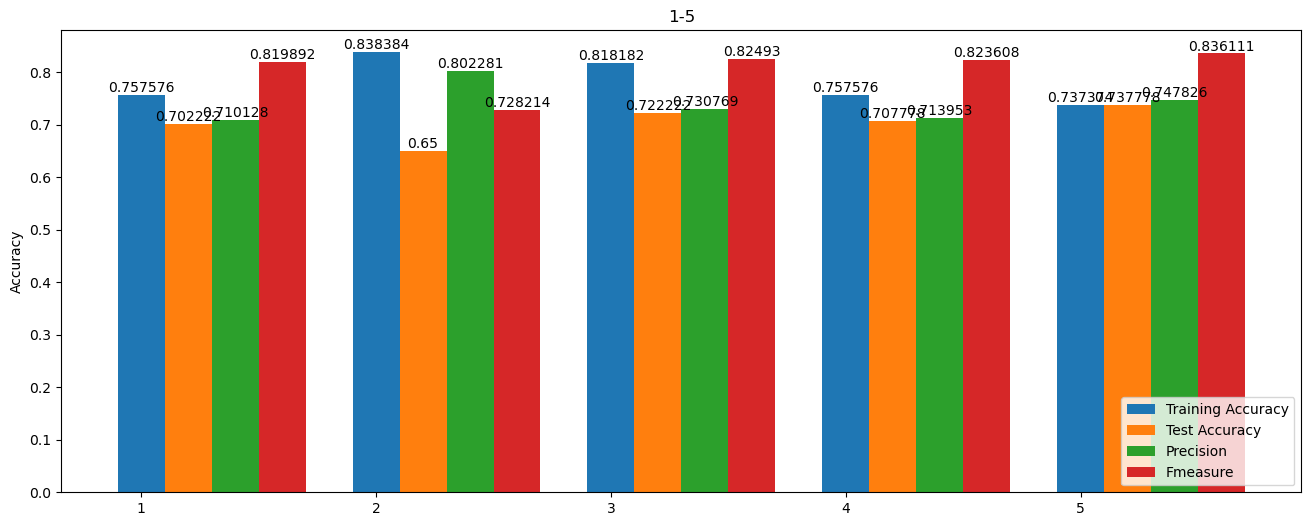

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

labels = ['1', '2', '3', '4', '5']
fig, ax = plt.subplots()

fig.set_size_inches(16, 6)
trainingRect = ax.bar( [0, 1, 2, 3, 4], trainAcc, 0.2, label='Training Accuracy')
testingRect = ax.bar([0.2, 1.2, 2.2, 3.2, 4.2], testAcc, 0.2, label='Test Accuracy')
precRect = ax.bar( [0.4, 1.4, 2.4, 3.4, 4.4], precision, 0.2, label='Precision')
fRect = ax.bar([0.6, 1.6, 2.6, 3.6, 4.6], fMeasure, 0.2, label='Fmeasure')
ax.set_title('1-5')
ax.set_ylabel('Accuracy')

plt.xticks([0, 1, 2, 3, 4], labels)
ax.legend()
plt.legend(loc='lower right')
ax.bar_label(trainingRect)
ax.bar_label(testingRect)
ax.bar_label(precRect)
ax.bar_label(fRect)
plt.show()

In [ ]:
from sklearn.model_selection import KFold, cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, f1_score

scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision': make_scorer(precision_score),
           'f1_score': make_scorer(f1_score)}

results2 = cross_validate(clf, X, Y, cv=KFold(n_splits=10), scoring=scoring)

print(f'Accuracy: {np.mean(results2["test_accuracy"]) :0.2f}' )
print(f'Precision: {np.mean(results2["test_precision"]): 0.2f}')
print(f'F-Measure: {np.mean(results2["test_f1_score"]):0.2f}' )

Accuracy: 0.73
Precision:  0.79
F-Measure: 0.81


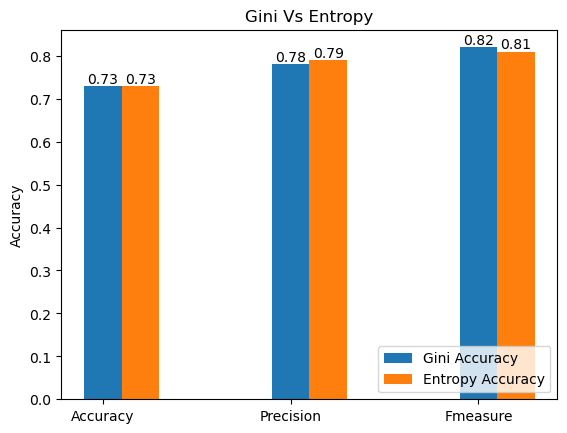

In [ ]:
labels = ['Accuracy', 'Precision', 'Fmeasure']
fig, ax = plt.subplots()

giniCross = [round(np.mean(results["test_accuracy"]),2) , round(np.mean(results["test_precision"]),2), round(np.mean(results["test_f1_score"]),2)]
entropyCross = [round(np.mean(results2["test_accuracy"]),2) , round(np.mean(results2["test_precision"]),2), round(np.mean(results2["test_f1_score"]),2)]

giniRect = ax.bar([0, 1, 2], giniCross, 0.2, label='Gini Accuracy')
entropyRect = ax.bar([0.2, 1.2, 2.2], entropyCross, 0.2, label='Entropy Accuracy')
ax.set_title('Gini Vs Entropy')
ax.set_ylabel('Accuracy')

plt.xticks([0, 1, 2], labels)
ax.legend()
plt.legend(loc='lower right')
ax.bar_label(giniRect)
ax.bar_label(entropyRect)

plt.show()

Text(0, 0.5, 'Accuracy')

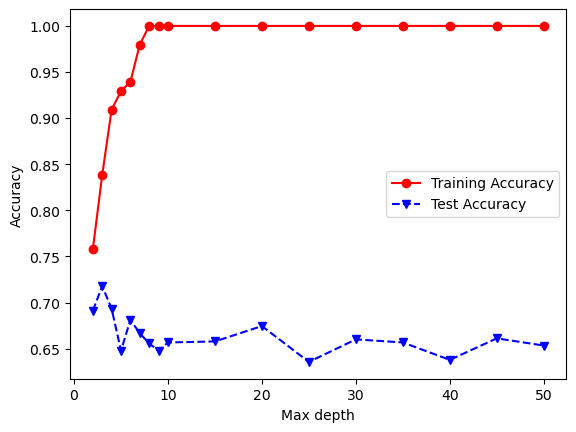

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.9, random_state=1)


maxdepths = [2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50]

trainAccDepth = np.zeros(len(maxdepths))
testAccDepth = np.zeros(len(maxdepths))

index = 0
for depth in maxdepths:
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    clf = clf.fit(X_train, Y_train)
    Y_predTrain = clf.predict(X_train)
    Y_predTest = clf.predict(X_test)
    trainAccDepth[index] = accuracy_score(Y_train, Y_predTrain)
    testAccDepth[index] = accuracy_score(Y_test, Y_predTest)
    index += 1

plt.plot(maxdepths,trainAccDepth,'ro-',maxdepths,testAccDepth,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Max depth')
plt.ylabel('Accuracy')

The plot abover shows that training accuracy will continue to improve as the max depth of the tree increases, but doesnt get much better after around a depth of 10. The test accuracy decreases after around a depth of 3, due to model overfitting.